# Introdução 

A análise de Churn, ou rotatividade de clientes, desempenha um papel crucial na estratégia de negócios de qualquer empresa que busca não apenas conquistar novos clientes, mas também manter e cultivar relacionamentos duradouros. Nesta análise, exploraremos um dataset sintético contendo informações de clientes de um banco, e uma variável alvo informando se houve Churn ou Não. 

A partir da exploração das variáveis, pretendemos ao fim da análise criar um modelo de Machine Learning por meio de uma Árvore de Decisão visando identificar os clientes que tendem ao Churn. 

### Dicionário de Variáveis 
O dataset que utilizaremos para predição é um banco fictício, e conta com o seguinte dicionário de variáveis: <br>
- Credit Score: valor númerico que representa a pontuação de crédito do cliente <br>
- Gender: Gênero declarado do cliente <br> 
- Age: Idade do Cliente  <br>
- Tenure: Número de anos que o cliente está no banco  <br>
- Balance: Saldo da conta do Cliente  <br>
- NumOfProducts: Quantidade de produtos bancários que o cliente utiliza <br>
- HasCrCard: Cliente possui cartão de crédito, sim = 1 e não = 0 <br>
- IsActiveMember: Cliente é um membro ativo, sim = 1 e não = 0 <br>
- EstimatedSalary: Salário estimado do cliente <br>
- Surname: sobrenome codificado por rótulo  <br>
- Geografia: categorizado por France = 1, Germany = 2 e Spain = 3.  <br>
- Exited: Houve churn por parte deste cliente, sim = 1 e não = 0 <br>

Link para o Dataset: https://www.kaggle.com/datasets/cybersimar08/binary-classification-of-bank-churn-synthetic-data

## Importando Bibliotecas 

In [154]:
# Bibliotecas para EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Bibliotecas para modelo 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,average_precision_score  
import category_encoders as ce 

# Mostrar todas as colunas de um dataframe 
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")


## Inspeção dos Dados

In [69]:
# Importando o Dataset
base = pd.read_csv('Dataset_bank.csv')
base.head(20)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,-3.124437e-07,-4.605946e-07,1.335144e-06,-6.116396e-06,6.694578e-06,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,4.813383e-07,8.389315e-07,-1.182815e-06,7.812514e-06,1.663329e-06,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,-3.447294e-04,-2.025034e-03,-1.028072e-03,-9.387155e-03,1.506864e-02,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,-7.220936e-05,-1.046163e-03,1.312913e-03,8.463003e-04,1.607584e-02,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,-1.037135e-07,-5.451338e-07,4.984559e-08,-1.568877e-06,1.848919e-06,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
5,984,588.0,36.0,4.0,131778.58,1.0,1,0,136024.31,1,-7.737153e-04,1.121820e-03,1.568430e-03,-1.408976e-02,2.160403e-02,0,1,0,0,1,0.0,569.646742,0.968787,0.111111,144.0
6,436,593.0,30.0,8.0,144772.69,1.0,1,0,29792.11,0,5.449123e-01,1.665745e-02,-6.017030e-01,-1.002424e-02,-4.477552e-01,1,0,0,1,0,0.0,2881.642326,4.859431,0.266667,240.0
7,543,678.0,37.0,1.0,138476.41,1.0,1,0,106851.60,0,-3.069775e-08,-9.823756e-08,2.098668e-07,-5.445177e-07,-1.269406e-06,0,0,1,0,1,0.0,878.667292,1.295969,0.027027,37.0
8,1669,676.0,43.0,4.0,0.00,2.0,1,0,142917.13,0,2.161847e-04,-9.233229e-04,-1.722677e-03,1.817387e-03,7.487849e-03,1,0,0,0,1,0.0,0.000000,0.000000,0.093023,172.0
9,427,583.0,40.0,4.0,81274.33,1.0,1,1,170843.07,0,-1.443327e-06,-1.169783e-05,6.826270e-07,-2.784806e-05,1.075039e-05,0,1,0,0,1,1.0,277.347711,0.475725,0.100000,160.0


In [70]:
# Análise do tipo do dado
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [71]:
#contagem de valores nulos
nulos = base.isnull().sum()
nulos 

Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Surname_tfidf_0       0
Surname_tfidf_1       0
Surname_tfidf_2       0
Surname_tfidf_3       0
Surname_tfidf_4       0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

In [72]:
contagem = pd.DataFrame(columns=['Variável','Contagem'])

for coluna in base.columns: 
    dado = {'Variável':coluna, 'Contagem':base[coluna].value_counts().shape[0]}
    contagem = contagem.append(dado, ignore_index=True)

contagem

,Variável,Contagem
0,Surname,2932
1,CreditScore,460
2,Age,73
3,Tenure,11
4,Balance,30239
5,NumOfProducts,4
6,HasCrCard,2
7,IsActiveMember,2
8,EstimatedSalary,55581
9,Exited,2


In [73]:
#Unificação das colunas de país 
base['Geografia'] = 0 
base.loc[base['France'] == 1, 'Geografia'] = 1
base.loc[base['Germany'] == 1, 'Geografia'] = 2
base.loc[base['Spain'] == 1, 'Geografia'] = 3

#Unificação das colunas de país categórica
base['Geografia_cat'] = 0 
base.loc[base['France'] == 1, 'Geografia_cat'] = 'France'
base.loc[base['Germany'] == 1, 'Geografia_cat'] = 'Germany'
base.loc[base['Spain'] == 1, 'Geografia_cat'] = 'Spain'

base

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Geografia,Geografia_cat
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,-3.124437e-07,-4.605946e-07,1.335144e-06,-6.116396e-06,6.694578e-06,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0,1,France
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,4.813383e-07,8.389315e-07,-1.182815e-06,7.812514e-06,1.663329e-06,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0,1,France
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,-3.447294e-04,-2.025034e-03,-1.028072e-03,-9.387155e-03,1.506864e-02,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0,1,France
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,-7.220936e-05,-1.046163e-03,1.312913e-03,8.463003e-04,1.607584e-02,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0,1,France
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,-1.037135e-07,-5.451338e-07,4.984559e-08,-1.568877e-06,1.848919e-06,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0,3,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,-4.763763e-12,1.141194e-10,1.165557e-10,-1.177945e-10,-4.259289e-10,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0,1,France
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,-1.510370e-12,6.854618e-11,4.674402e-11,-5.834499e-10,-4.198716e-10,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0,1,France
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,-1.510370e-12,6.854618e-11,4.674402e-11,-5.834499e-10,-4.198716e-10,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0,1,France
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,8.306523e-05,9.769052e-04,1.606554e-03,-7.042491e-04,1.883437e-03,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0,1,France


In [74]:
#Unificação das colunas de Gênero
base['Gender'] = 0 
base.loc[base['Female'] == 1, 'Gender'] = 0
base.loc[base['Male'] == 1, 'Gender'] = 1

Identificamos que o dataframe não apresenta valores nulos e as variáveis estão no tipo de dado adequado.

## Exploração dos Dados 

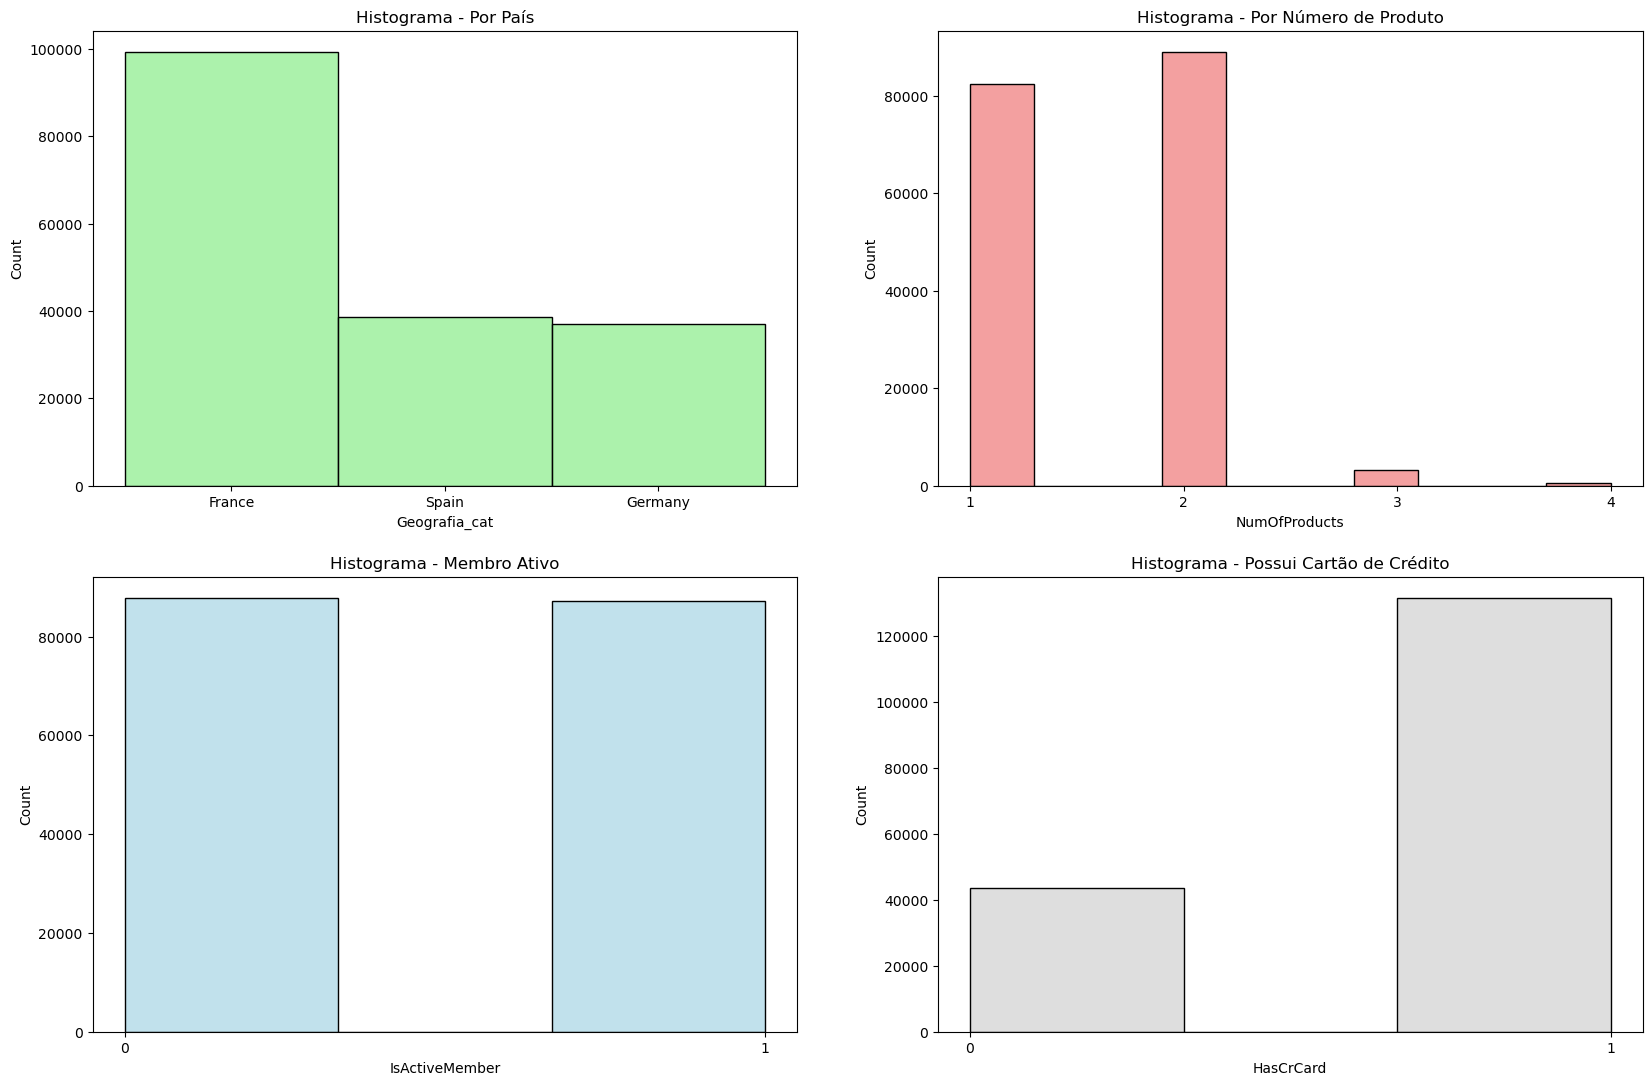

In [75]:
# Subplot de 2 gráficos 
fig, axes = plt.subplots(2, 2, figsize=(20, 13))

# Gráfico 1
sns.histplot(base['Geografia_cat'], ax=axes[0,0], color='lightgreen')
axes[0,0].set_title('Histograma - Por País')

#Gráfico 2 
sns.histplot(base['NumOfProducts'], ax=axes[0,1], color='lightcoral', bins=10)
axes[0,1].set_title('Histograma - Por Número de Produto')
axes[0,1].set_xticks([1,2,3,4])

# Gráfico 3
sns.histplot(base['IsActiveMember'], ax=axes[1,0], color='lightblue', bins=3)
axes[1,0].set_title('Histograma - Membro Ativo')
axes[1,0].set_xticks([0,1])

# Gráfico 4
sns.histplot(base['HasCrCard'], ax=axes[1,1], color='lightgray', bins=3)
axes[1,1].set_title('Histograma - Possui Cartão de Crédito')
axes[1,1].set_xticks([0,1])

Os dados apresentam certo desbalanceamento referente a quantidade de produtos adquiridos pelo cliente e dados sobre cartão de crédito. 

<br>

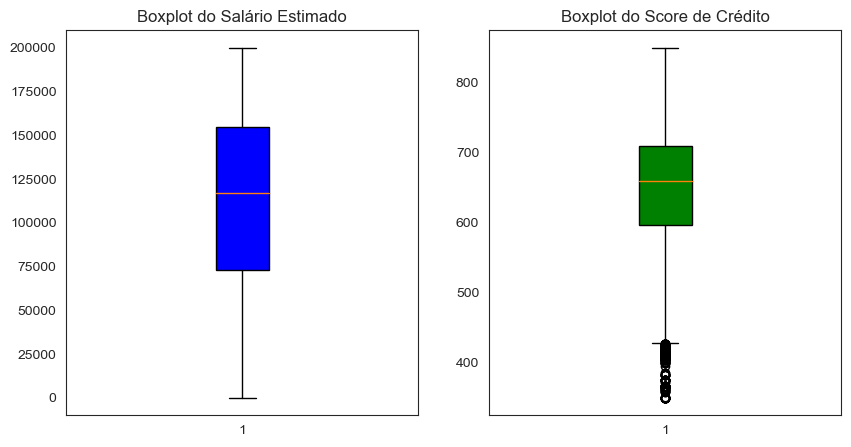

In [206]:
#Criação de figura com 2 subplots 
fig, axs = plt.subplots(1,2, figsize=(10,5))

#Boxplot para variável subscribers 
bp1 = axs[0].boxplot(base['EstimatedSalary'], patch_artist = True)
axs[0].set_title('Boxplot do Salário Estimado')
bp1['boxes'][0].set_facecolor('blue')


#Boxplot para variável video views
bp2 = axs[1].boxplot(base['CreditScore'], patch_artist = True)
axs[1].set_title('Boxplot do Score de Crédito')
bp2['boxes'][0].set_facecolor('green')

#Plot dos Gráficos 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

A variável Score de Crédito seta como taxa mínima um score aproximado de 430, definindo como outliers inferiores todos os scores com valores menores. Quando olhamos a variável renda declarada evidencia certo balanceamento nos dados, sem a presença de outliers. 

<br>

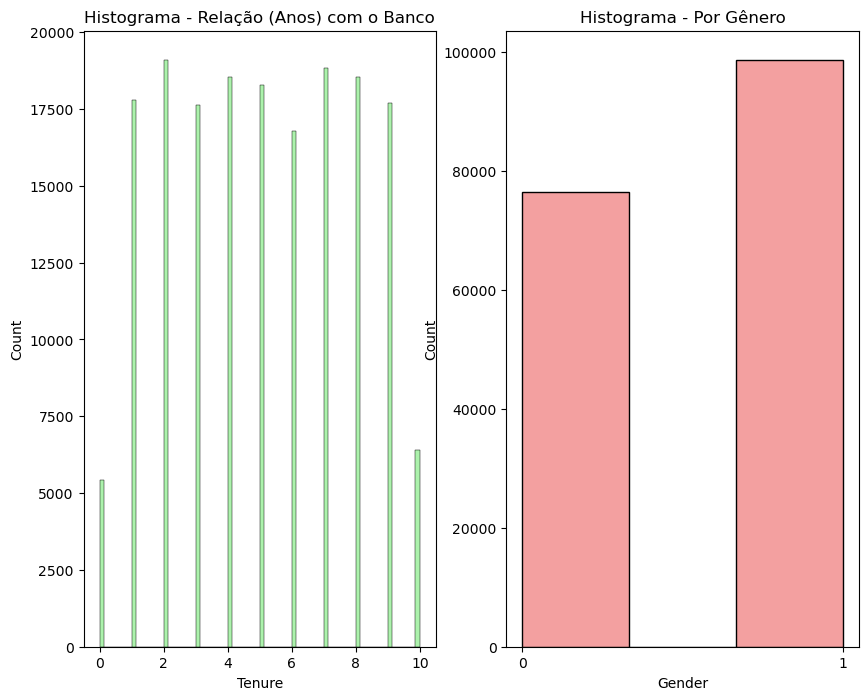

In [77]:
# Subplot de 2 gráficos 
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Gráfico 1
sns.histplot(base['Tenure'], ax=axes[0], color='lightgreen')
axes[0].set_title('Histograma - Relação (Anos) com o Banco')

#Gráfico 2 
sns.histplot(base['Gender'], ax=axes[1], color='lightcoral', bins=3)
axes[1].set_title('Histograma - Por Gênero')
axes[1].set_xticks([0,1])

plt.show()


A variável categórica de gênero apresenta certo desbalanceamento, apresentando ~56% dos dados de gênero masculino, e ~44% feminino. A variável Tenure (tempo estimado do cliente utilizando os serviços do banco) apresenta uma amostra uma amostra bem distribuída no intervalo dos anos da amostra. 

<br>

## Correlacionando com a variável alvo 

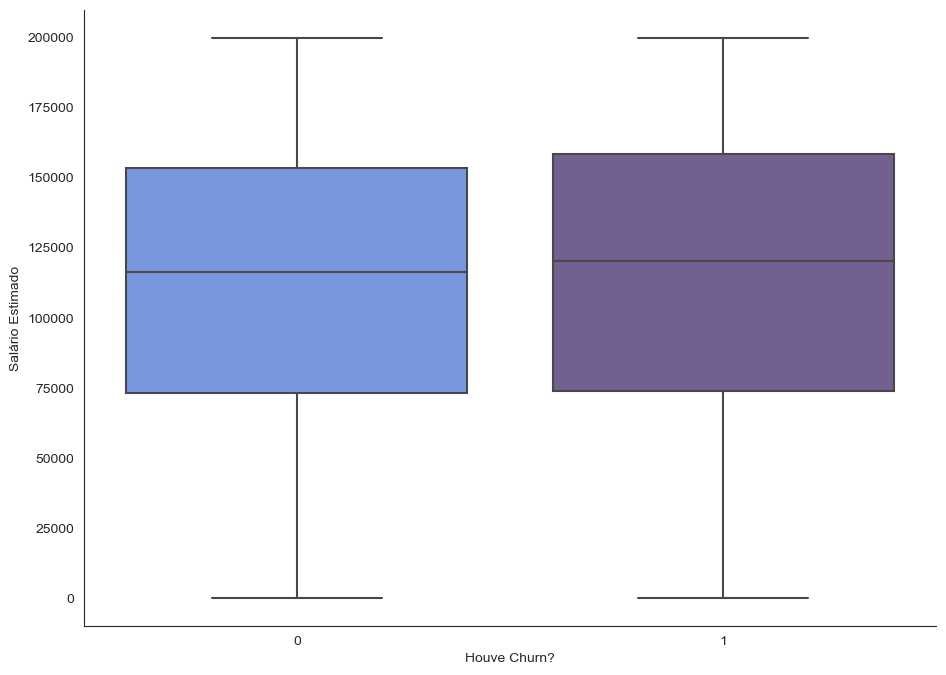

In [205]:
# Análise da variável Salário Estimado relacionando com o Churn 
salario = base[['EstimatedSalary', 'Exited']]

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sns.set_style("white")

#Cores dos Boxes
colors = ['#6890F0', '#705898']

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
ax = sns.boxplot(x='Exited', y='EstimatedSalary',data=salario, showfliers=True, palette=colors)
plt.xlabel('Houve Churn?')
plt.ylabel('Salário Estimado')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Clientes que deram Churn apresentam uma mediana do salário estimado superior ao dos clientes que não deram Churn. O limite máximo e mínimo das informações apresentam valores iguais. 

<br>

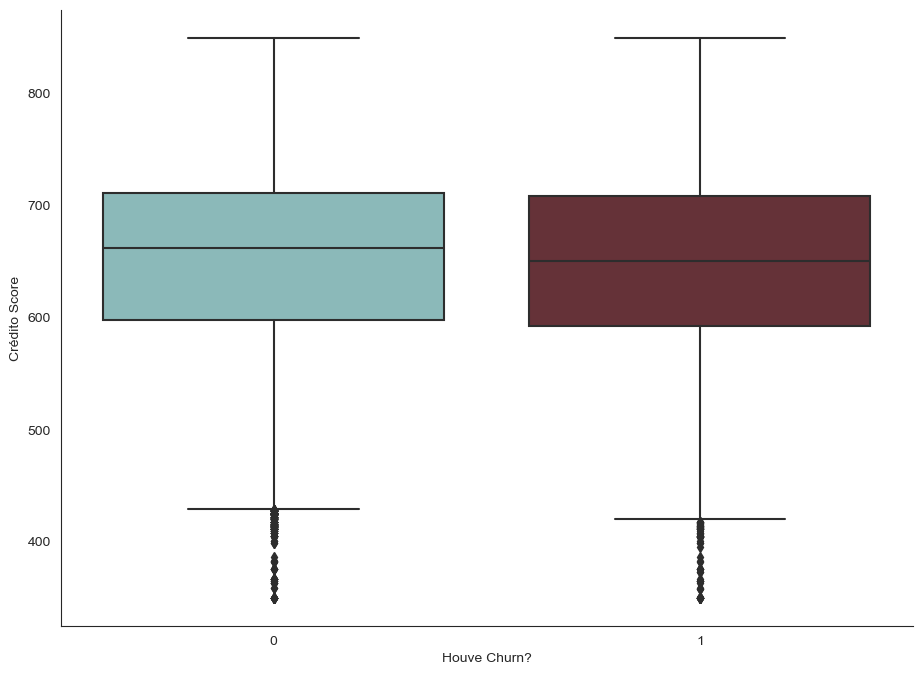

In [207]:
# Análise das variável CreditScore relacionando com o Churn 
score = base[['CreditScore', 'Exited']]

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sns.set_style("white")

#Cores dos Boxes
colors = ['#83C0C1', '#6D2932']

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
ax = sns.boxplot(x='Exited', y='CreditScore',data=score, showfliers=True, palette=colors)
plt.xlabel('Houve Churn?')
plt.ylabel('Crédito Score')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

<br>

Text(0.5, 1.0, 'Member Active and Churn')

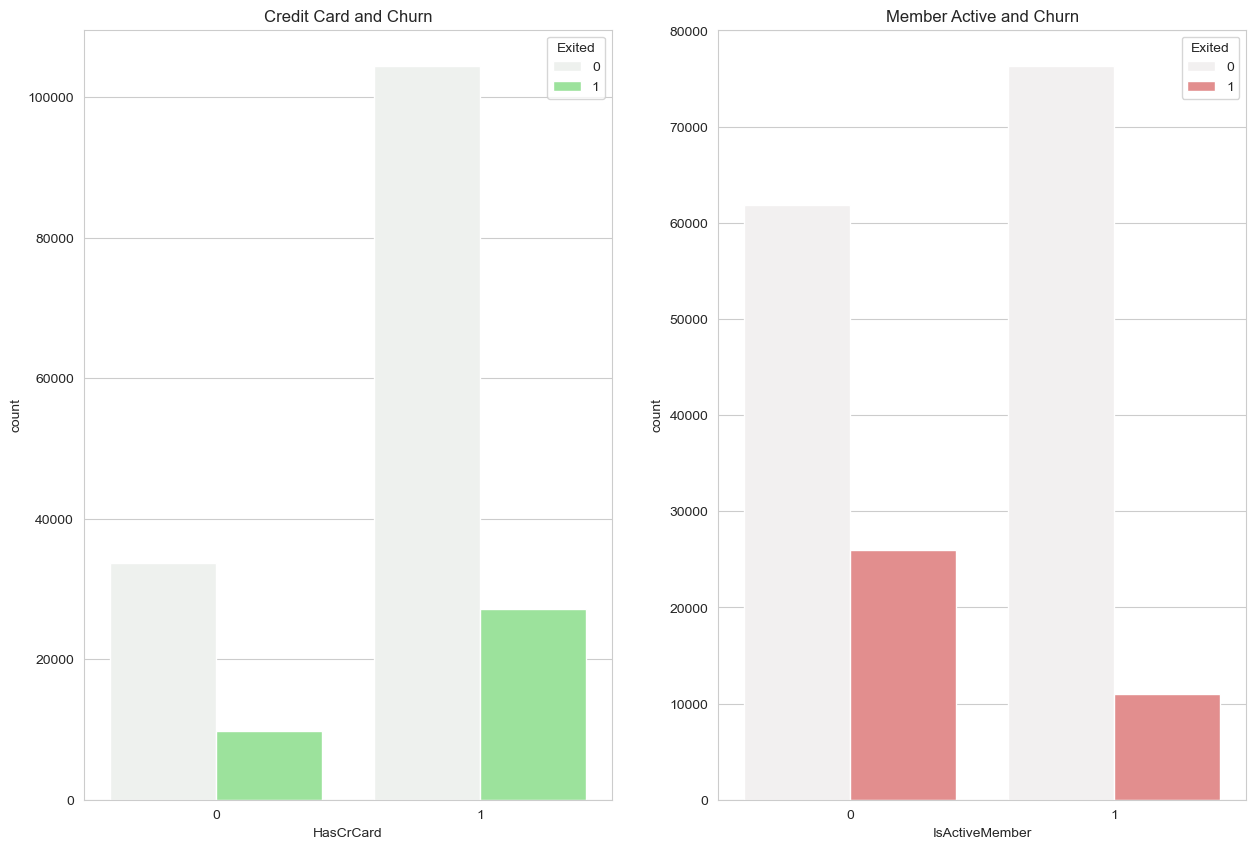

In [191]:
credit_card = base[['HasCrCard', 'Exited']]
member_active = base[['IsActiveMember', 'Exited']]

# Subplot de 2 gráficos 
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Gráfico 1
sns.countplot(x='HasCrCard', data=credit_card, ax=axes[0], hue='Exited', color='lightgreen')
axes[0].set_title('Credit Card and Churn')

#Gráfico 2 
sns.countplot(x='IsActiveMember', data=member_active, ax=axes[1], hue='Exited', color='lightcoral')
axes[1].set_title('Member Active and Churn')

Os clientes que deram Churn, em sua maioria, dispõem de cartão de crédito; por outro lado, são tidos como membros não ativos. 

<br>

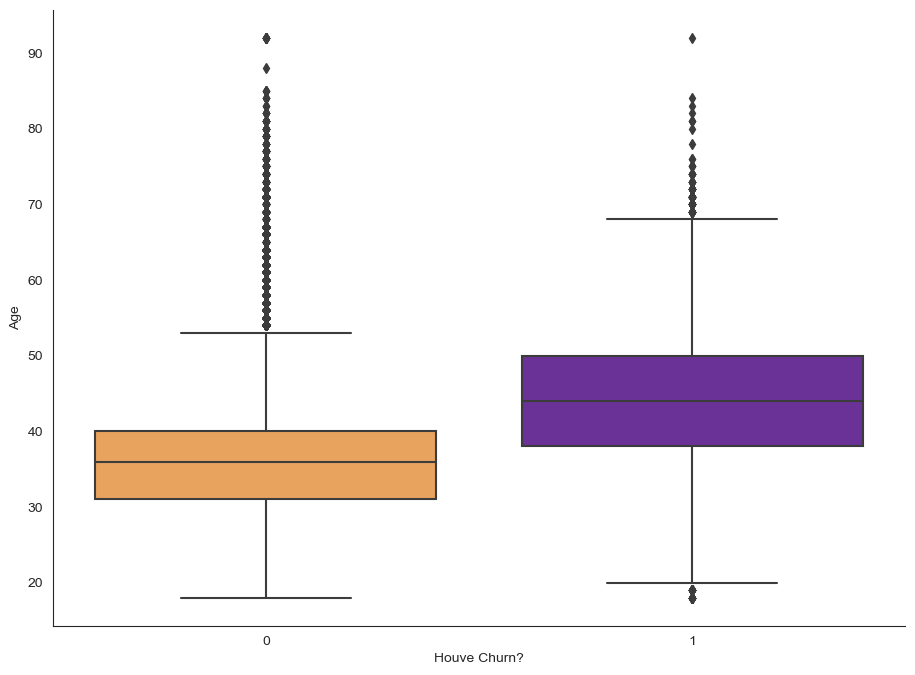

In [203]:
# Análise das variável CreditScore relacionando com o Churn 
age = base[['Age', 'Exited']]

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 8))
sns.set_style("white")

#Cores dos Boxes
colors = ['#FFA447', '#6C22A6']

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
ax = sns.boxplot(x='Exited', y='Age',data=age, showfliers=True, palette=colors)
plt.xlabel('Houve Churn?')
plt.ylabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Variável idade chama maior atenção quando analisada em relação ao churn, de modo que podemos possamos descobrir que enquanto a mediana da idade dos clientes que não deram churn é de 36 anos, a mediana da idade para os clientes que deram churn é de 45 anos. 

<br>

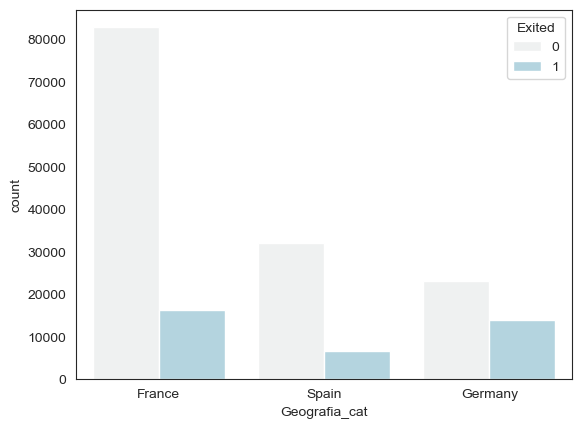

In [261]:
# Plot do Gráfico
sns.countplot(x='Geografia_cat', data=base,hue='Exited', color='lightblue')
axes[0].set_title('Country and Churn')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Apesar de apresentar uma amostra de clientes inferior a Espanha e França, verifica-se uma grande quantidade de clientes que deram Churn localizados na Alemanha. 

<br>

## Base para o Modelo 

In [78]:
# Remoção de colunas que não impactam no Churn 
base_drop = ['Surname_tfidf_0','Surname_tfidf_1','Surname_tfidf_2','Surname_tfidf_3','Surname_tfidf_4', 'France', 'Germany',
            'Spain','Female','Male','Cred_Bal_Sal','Bal_sal','Tenure_Age','Age_Tenure_product']

base.drop(columns=base_drop,inplace=True)

base.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Mem__no__Products,Geografia,Geografia_cat,Gender
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0.0,1,France,1
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,2.0,1,France,1
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0.0,1,France,1
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1.0,1,France,1
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,2.0,3,Spain,1


In [79]:
# Contagem dos Valores Target 
base['Exited'].value_counts()

0    138071
1     36957
Name: Exited, dtype: int64

## Modelagem 

In [249]:
# Transformações de variáveis numéricas para categoricas
base['Gender'] = base['Gender'].astype('str')
base['Geografia'] = base['Geografia'].astype('str')

In [250]:
# Separação entre variável alvo e as variáveis preditivas
X = base.drop(columns=['Exited','Geografia_cat','Surname'], axis = 1)
y = base['Exited']

In [251]:
# Separação entre treino e teste 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state=42, stratify=y)

In [252]:
# Tamanho do x_train e x_test 
x_train.shape , x_test.shape 

((122519, 11), (52509, 11))

In [253]:
x_train.dtypes 

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Mem__no__Products    float64
Geografia             object
Gender                object
dtype: object

In [254]:
cat_cols = x_train.select_dtypes(include = ['object']).columns
num_cols = x_train.select_dtypes(exclude = ['object']).columns

In [255]:
# Criação do modelo
modelo = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [256]:
y_pred = modelo.predict(x_test)

In [257]:
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Acurácia do modelo: 0.8589


In [258]:
# Avaliação do modelo 
print('Training score: {:.4f}'.format(modelo.score(x_train, y_train)))
print('Test score: {:.4f}'.format(modelo.score(x_test, y_test)))

Training score: 0.8698
Test score: 0.8589


In [259]:
#Avaliação do modelo 
print(f"Precision Score: {precision_score(y_test, y_pred):.2%}")
print(f"Recall Score: {recall_score(y_test, y_pred):.2%}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2%}")

Precision Score: 71.84%
Recall Score: 54.57%
F1 Score: 62.02%


## Conclusão
1. Nesse projeto construi um modelo de classificação via árvore de decisão para prever clientes dariam Churn. O critério utilizado para construção do modelo fez uso do Coeficiente de Gini, e apresentou uma acurácia no conjunto de teste de 0.85. <br>
2. Apresentou-se em ambos os conjuntos de treino e teste uma acurácia média similar, indicando a não ocorrência de um overfitting. <br>
3. Olhando para Precisão, temos que nosso modelo acertou 71.84% dos casos que ele disse que era Churn. Entretanto, quando olhamos para Recall o modelo performou apenas 54.57% 